## Dataset Information
The dataset contains information about customers, and the objective of this task is to segment customers into groups for marketing purposes. The dataset has 200 rows with the following 5 features:

| Feature                   | Description                                                        |
|---------------------------|--------------------------------------------------------------------|
| CustomerID                | A unique identifier for each customer.                               |
| Gender                    | The gender of the customer (e.g., Male or Female).                   |
| Age                       | The age of the customer.                                            |
| Annual Income (k$)        | The annual income of the customer in thousands of dollars.          |
| Spending Score (1-100)    | A spending score assigned to the customer, ranging from 1 to 100,   |
|                           | indicating their spending behavior.                                 |


## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
# Read the file
adress = r'Mall-Customers.csv'

df = pd.read_csv(adress)

In [3]:
# First 5 rows in the dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Find the number of rows and columns
df.shape

(200, 5)

In [5]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Explatory Data Analysis

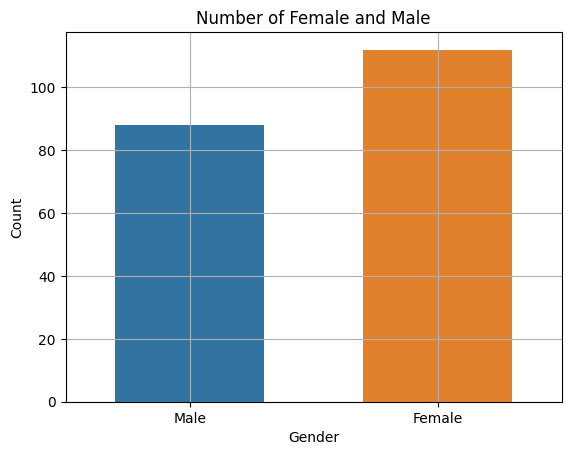

In [7]:
# Count of Gender
sns.countplot(data=df, x='Gender', width=0.6)

# Customize the plot
plt.title('Number of Female and Male')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)

# Show the plot
plt.show()

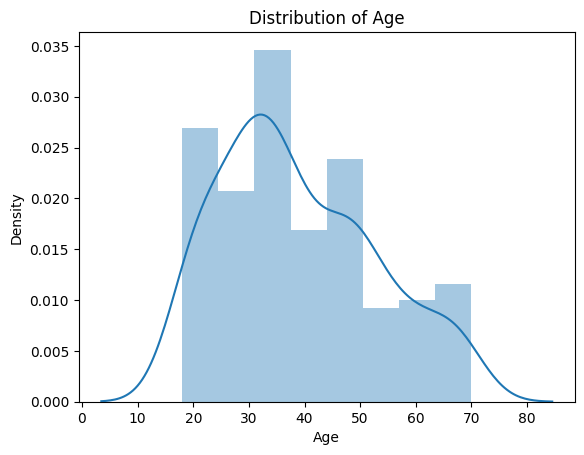

In [8]:
# Distribution of age
sns.distplot(df['Age'])

# Customize the plot
plt.title('Distribution of Age')
plt.xlabel('Age')

# Show the plot
plt.show()

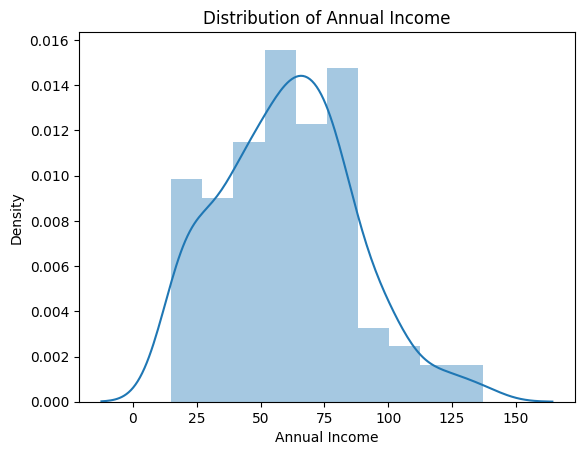

In [9]:
# Distribution of annual income
sns.distplot(df['Annual Income (k$)'])

# Customize the plot
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')

# Show the plot
plt.show()

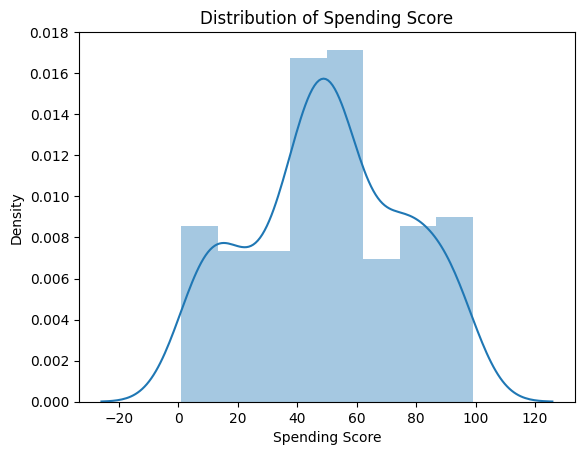

In [10]:
# Distribution of Spending Score
sns.distplot(df['Spending Score (1-100)'])

# Customize the plot
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')

# Show the plot
plt.show()

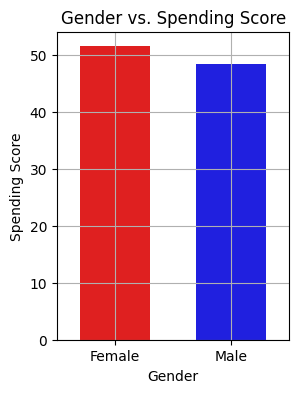

In [11]:
# Visualize the spending score for each gender
# Create a bar plot 
plt.figure(figsize=(3, 4))
mean_score_by_gender = df.groupby('Gender')['Spending Score (1-100)'].mean().reset_index()

sns.barplot(x='Gender', y='Spending Score (1-100)', data = mean_score_by_gender,
            palette={'Male': 'blue', 'Female': 'red'}, width=0.6)

# Customize the plot
plt.title('Gender vs. Spending Score')
plt.xlabel('Gender')
plt.ylabel('Spending Score')
plt.grid(True)

# Show the plot
plt.show()

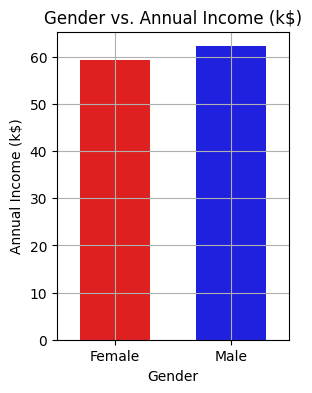

In [12]:
# Visualize the mean of anual income for each gender
# Create a bar plot 
plt.figure(figsize=(3, 4))
mean_income_by_gender = df.groupby('Gender')['Annual Income (k$)'].mean().reset_index()

sns.barplot(x='Gender', y='Annual Income (k$)', data = mean_income_by_gender ,
            palette={'Male': 'blue', 'Female': 'red'}, width=0.6)

# Customize the plot
plt.title('Gender vs. Annual Income (k$)')
plt.xlabel('Gender')
plt.ylabel('Annual Income (k$)')
plt.grid(True)

# Show the plot
plt.show()

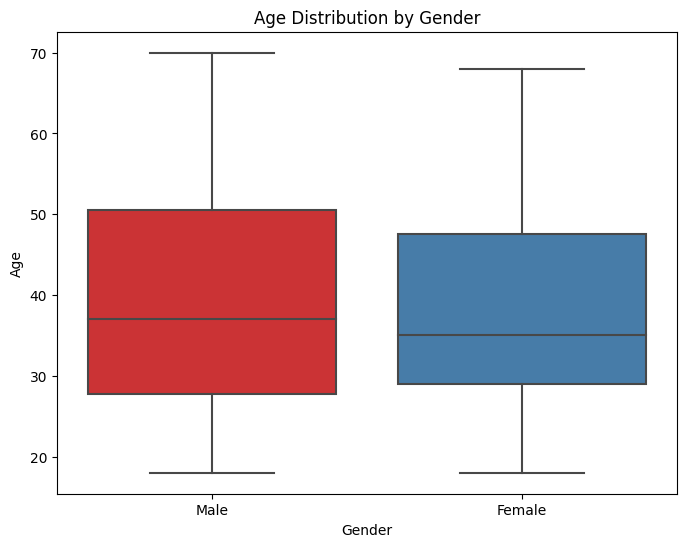

In [13]:
# Visualize the distribution of ages for each gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df, palette='Set1')

plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.show()

## Clustering on 2 features

In [14]:
# Seperate needed data for clustering
X = df.iloc[:, [3,4]].values

In [15]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Choose the number of clusters
# Find wcss value for different number of clusters

wcss = []
for i in range(1,11) :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

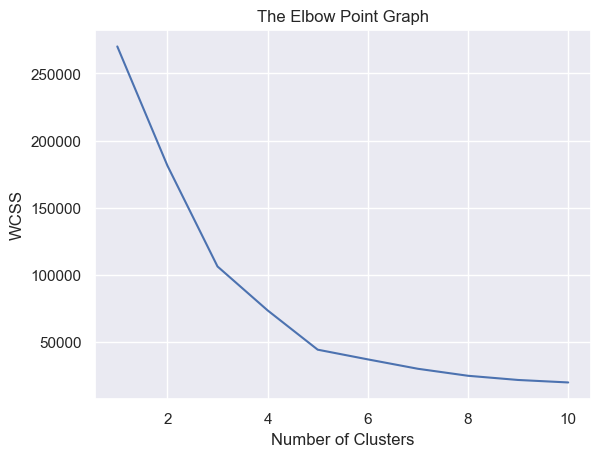

In [17]:
# Plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimum number of clusters = 5

In [18]:
# Train kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

# return a label for each data point based on 
Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


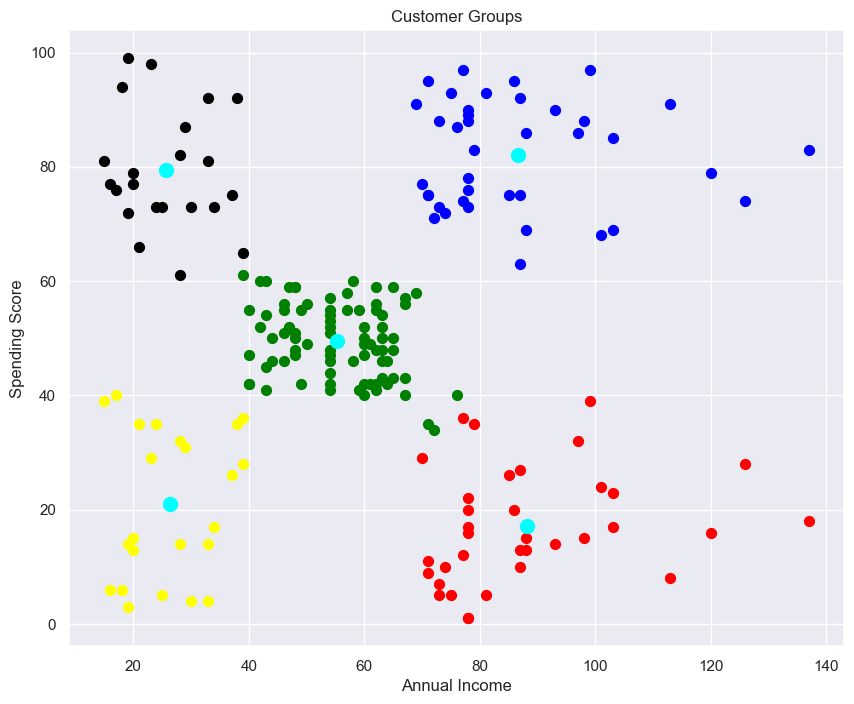

In [19]:
# Visulize all the clusters
plt.figure(figsize=(10,8))
plt.scatter(X[Y == 0,0],X[Y == 0,1], s = 50, c= 'green', label = 'cluster 1')
plt.scatter(X[Y == 1,0],X[Y == 1,1], s = 50, c= 'blue', label = 'cluster 2')
plt.scatter(X[Y == 2,0],X[Y == 2,1], s = 50, c= 'red', label = 'cluster 3')
plt.scatter(X[Y == 3,0],X[Y == 3,1], s = 50, c= 'yellow', label = 'cluster 4')
plt.scatter(X[Y == 4,0],X[Y == 4,1], s = 50, c= 'black', label = 'cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Clustering on 3 features

In [20]:
# Seperate needed data for Clustering
df2 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [21]:
# Choose the number of clusters
# Find wcss value for different number of clusters

wcss = []
for i in range(1,11) :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

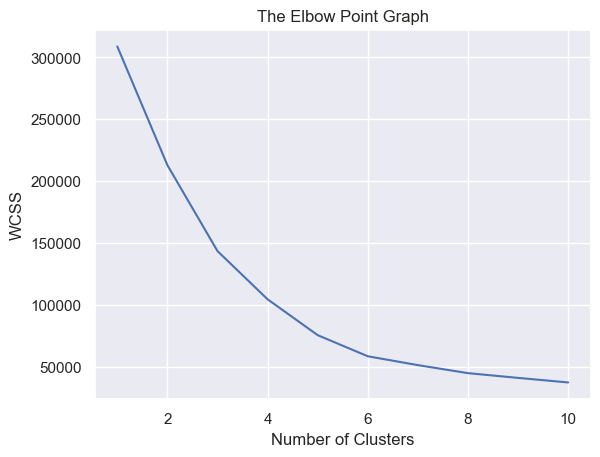

In [22]:
# Plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimum number of clusters = 5

In [23]:
# Train kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

# return a label for each data point based on 
Y = kmeans.fit_predict(df2)
df2['Label'] = Y
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Label
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0


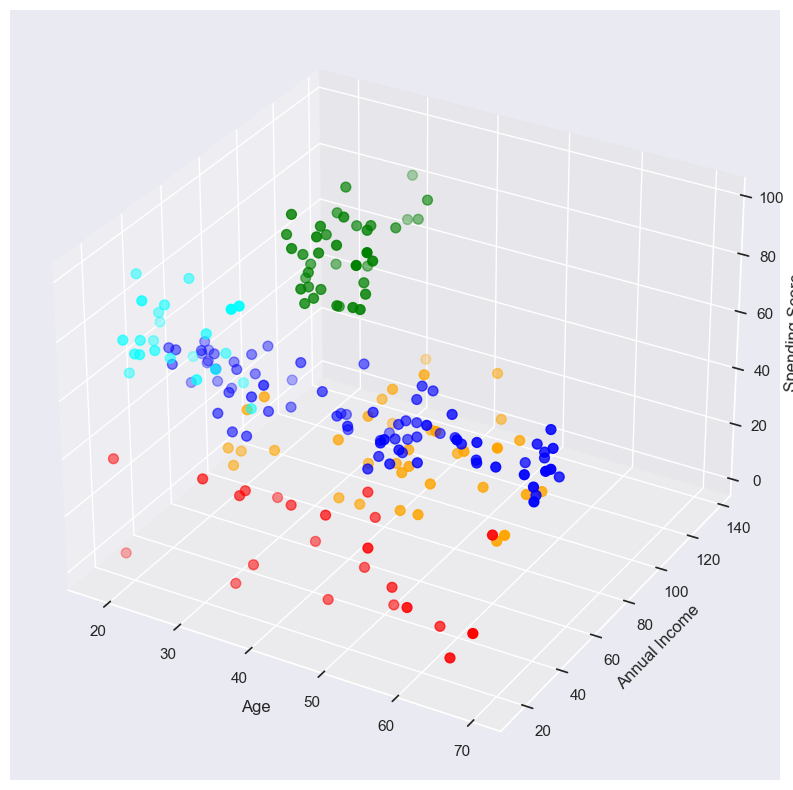

In [24]:
# Visulize all the clusters
# 3d scatter plot
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df2['Age'][df2['Label'] == 0], df2['Annual Income (k$)'][df2['Label'] == 0], df2['Spending Score (1-100)'][df2['Label'] == 0], c = 'red', s = 50)
ax.scatter(df2['Age'][df2['Label'] == 1], df2['Annual Income (k$)'][df2['Label'] == 1], df2['Spending Score (1-100)'][df2['Label'] == 1], c = 'green', s = 50)
ax.scatter(df2['Age'][df2['Label'] == 2], df2['Annual Income (k$)'][df2['Label'] == 2], df2['Spending Score (1-100)'][df2['Label'] == 2], c = 'blue', s = 50)
ax.scatter(df2['Age'][df2['Label'] == 3], df2['Annual Income (k$)'][df2['Label'] == 3], df2['Spending Score (1-100)'][df2['Label'] == 3], c = 'cyan', s = 50)
ax.scatter(df2['Age'][df2['Label'] == 4], df2['Annual Income (k$)'][df2['Label'] == 4], df2['Spending Score (1-100)'][df2['Label'] == 4], c = 'orange', s = 50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()